In [1]:
import scanpy as sc 
import anndata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
epo_ad = sc.read("export_data/epo_raw_ep_8_sn_2013249_nlayers_33_sample_size_1024.h5ad")
epo_ad

AnnData object with n_obs × n_vars = 35834 × 14751
    obs: 'batch', 'treatment', 'metacell', 'genetics', 'group', 'n_genes'
    var: 'n_cells'
    obsm: 'X_uce'

In [3]:
sc.pp.pca(epo_ad)
sc.pp.neighbors(epo_ad, use_rep="X_uce")
sc.tl.umap(epo_ad)

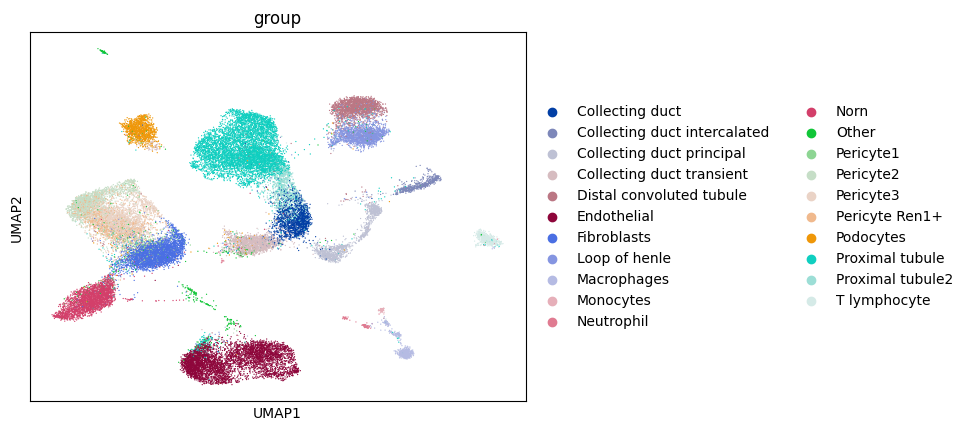

In [4]:
sc.pl.umap(epo_ad, color="group")

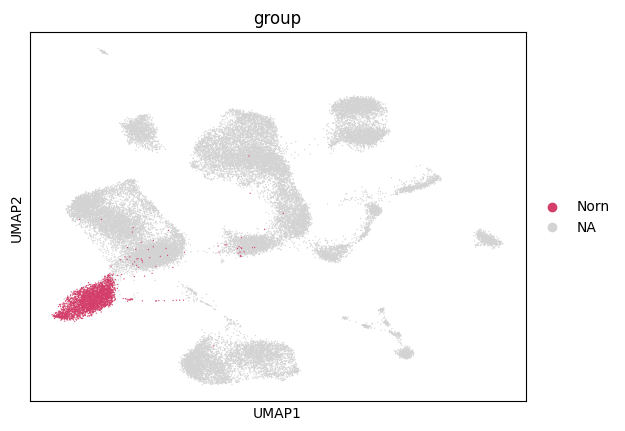

In [5]:
sc.pl.umap(epo_ad, color="group", groups=["Norn"])

In [6]:
kidney_atlas = sc.read("export_data/uce_tissue_kidney_per_dataset_33_8.h5ad")
kidney_atlas

AnnData object with n_obs × n_vars = 761180 × 1280
    obs: 'cell_type', 'tissue', 'idx', 'dataset'
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
ct_map = {"kidney proximal convoluted tubule epithelial cell":"epithelial cell",
"macrophage":"macrophage",
"B cell":"b cell",
"mesangial cell":"mesangial cell",
"kidney loop of Henle thick ascending limb epithelial cell":"epithelial cell",
"kidney distal convoluted tubule epithelial cell":"epithelial cell",
"kidney loop of Henle ascending limb epithelial cell":"epithelial cell",
"kidney collecting duct principal cell":"principal cell",
"lymphocyte":"lymphoid",
"fenestrated cell":"endothelial cell",
"epithelial cell of proximal tubule":"epithelial cell",
"brush cell":"neuron",
"podocyte (sensu Diptera)":"podocyte",
"T cell":"T cell",
"kidney cortex artery cell":"endothelial cell",
"natural killer cell":"NKT cell",
"kidney capillary endothelial cell":"endothelial cell",
"fibroblast":"fibroblast",
"plasma cell":"plasma cell",
"kidney proximal straight tubule epithelial cell":"epithelial cell",
"kidney collecting duct epithelial cell":"epithelial cell",
"leukocyte":"lymphoid",
"kidney cell":"misc",
"endothelial cell":"endothelial cell",
"cytotoxic T cell":"cd8 t cell",
"kidney collecting duct intercalated cell":"intercalated cell",
"kidney loop of Henle thin descending limb epithelial cell":"epithelial cell",
"kidney connecting tubule epithelial cell":"epithelial cell",
"podocyte":"podocyte",
"mature NK T cell":"NKT cell",
"monocyte":"monocyte",
"renal interstitial pericyte":"muscle cell",
"conventional dendritic cell":"dendritic cell",
"parietal epithelial cell":"epithelial cell",
"alternatively activated macrophage":"macrophage",
"non-classical monocyte":"monocyte",
"epithelial cell":"epithelial cell",
"plasmacytoid dendritic cell":"dendritic cell",
"mast cell":"granulocyte",
"kidney loop of Henle thin ascending limb epithelial cell":"epithelial cell",
"kidney interstitial fibroblast":"fibroblast",
"myofibroblast cell":"fibroblast",
"renal principal cell":"principal cell",
"renal beta-intercalated cell":"intercalated cell",
"renal alpha-intercalated cell":"intercalated cell",
"kidney loop of Henle medullary thick ascending limb epithelial cell":"epithelial cell",
"kidney loop of Henle epithelial cell":"epithelial cell",
"kidney loop of Henle cortical thick ascending limb epithelial cell":"epithelial cell",
"pericyte":"muscle cell",
"kidney cortex tubule cell":"endothelial cell",
"kidney glomerular epithelial cell":"epithelial cell",
"macula densa epithelial cell":"epithelial cell",
"glomerular endothelial cell":"endothelial cell",
"native cell":"stem cell",
"neutrophil":"granulocyte",
"dendritic cell":"dendritic cell",
"vasa recta descending limb cell":"endothelial cell",
"kidney afferent arteriole endothelial cell":"endothelial cell",
"kidney efferent arteriole endothelial cell":"endothelial cell",
"CD4-positive, alpha-beta T cell":"cd4 t cell",
"naive thymus-derived CD8-positive, alpha-beta T cell":"cd8 t cell",
"activated CD4-positive, alpha-beta T cell, human":"cd4 t cell",
"abnormal cell":"misc",
"CD14-positive monocyte":"monocyte",
"CD14-positive, CD16-positive monocyte":"monocyte",
"naive T cell":"T cell",
"effector CD4-positive, alpha-beta T cell":"cd4 t cell",
"regulatory T cell":"treg",
"dendritic cell, human":"dendritic cell",
"megakaryocyte":"erythroid",
"large pre-B-II cell":"b cell",
"promyelocyte":"granulocyte",
"fraction A pre-pro B cell":"b cell",
"epithelial cell of nephron":"epithelial cell",
"promonocyte":"myeloid",
"vascular associated smooth muscle cell":"muscle cell",
"pro-B cell":"b cell",
"B-2 B cell":"b cell",
"mature B cell":"b cell",
"keratinocyte":"keratinocyte",
"early lymphoid progenitor":"lymphoid",
"naive thymus-derived CD4-positive, alpha-beta T cell":"cd4 t cell",
"granulocyte monocyte progenitor cell":"granulocyte",
"megakaryocyte-erythroid progenitor cell":"erythroid",
"B-1 B cell":"b cell",
"group 3 innate lymphoid cell":"lymphoid",
"granulocyte":"granulocyte",
"small pre-B-II cell":"b cell",
"double-positive, alpha-beta thymocyte":"T cell",
"late pro-B cell":"b cell",
"immature B cell":"b cell",
"group 2 innate lymphoid cell":"lymphoid",
"skeletal muscle satellite cell":"muscle cell",
"erythrocyte":"erythroid",
"stromal cell":"stromal cell",
"kidney interstitial cell":"fibroblast",
"neural cell":"neuron",
"papillary tips cell":"endocrine cell",
"renal intercalated cell":"intercalated cell",
"erythroid progenitor cell":"erythroid",
"smooth muscle cell":"muscle cell",
"embryonic stem cell":"stem cell",
"stratified epithelial cell":"epithelial cell",
"enterocyte":"enterocyte",
"myeloid cell":"myeloid",
"cord blood hematopoietic stem cell":"HSC",
"professional antigen presenting cell":"lymphoid",
"mesenchymal stem cell":"mesenchymal stem cell",
"primordial germ cell":"stem cell",
"neuron":"neuron",
"goblet cell":"goblet cell",
"cell of skeletal muscle":"muscle cell",
"erythroid lineage cell":"erythroid",
"endocrine cell":"endocrine cell",
"acinar cell":"endocrine cell",
"chondrocyte":"chondrocyte",
"capillary endothelial cell":"endothelial cell",
"vasa recta ascending limb cell":"endothelial cell",
"CD8-positive, alpha-beta T cell":"cd8 t cell",
"progenitor cell":"stem cell",
"classical monocyte":"monocyte",
"kidney resident macrophage":"macrophage",
"kidney epithelial cell":"epithelial cell",
"urothelial cell":"epithelial cell",
"kidney collecting duct cell":"collecting duct cell",
"columnar/cuboidal epithelial cell":"epithelial cell",
"glomerular capillary endothelial cell":"endothelial cell",
"CD4-positive helper T cell":"cd4 t cell",
"mesenchymal cell":"mesenchymal stem cell"}

In [8]:
kidney_atlas.obs["coarse_cell_type"] = [ct_map[ct] for ct in kidney_atlas.obs.cell_type]

# Fit LogReg to EPO

In [9]:
#[print(f'"{ct}":"",') for ct in epo_ad.obs["group"].unique()]

epo_map = {
    "Norn":"Norn",
    "Proximal tubule":"Proximal tubule",
    "Collecting duct principal":"Collecting duct",
    "Distal convoluted tubule":"Distal convoluted tubule",
    "Fibroblasts":"Fibroblast",
    "Endothelial":"Endothelial",
    "Collecting duct transient":"Collecting duct",
    "Other":"misc",
    "Pericyte Ren1+":"Pericyte",
    "Podocytes":"Podocyte",
    "Pericyte3":"Pericyte",
    "Pericyte1":"Pericyte",
    "Pericyte2":"Pericyte",
    "Collecting duct intercalated":"Collecting duct",
    "Loop of henle":"Loop of henle",
    "Proximal tubule2":"Proximal tubule",
    "Macrophages":"Macrophage",
    "Neutrophil":"Granulocyte",
    "T lymphocyte":"T cell",
    "Collecting duct":"Collecting duct",
    "Monocytes":"Monocyte",
    
}

In [101]:
from sklearn.linear_model import LogisticRegression
epo_ad_no_misc = epo_ad[epo_ad.obs.group != "Other"]
X, y = epo_ad_no_misc.obsm["X_uce"], [epo_map[ct] for ct in epo_ad_no_misc.obs["group"].values]
clf = LogisticRegression(random_state=0).fit(X, y)

In [103]:
epo_ad_no_misc.obs["clf_groups"] = [epo_map[ct] for ct in epo_ad_no_misc.obs["group"].values]

In [109]:
epo_ad_no_misc_norn = epo_ad_no_misc[epo_ad_no_misc.obs["clf_groups"] == "Norn"]
np.mean(clf.predict(epo_ad_no_misc_norn.obsm["X_uce"].toarray()) == "Norn")

np.float64(0.9826119126896041)

In [11]:
X_atlas = kidney_atlas.X

In [12]:
preds = clf.predict(X_atlas)

In [13]:
import pickle

# save
with open('epo_logreg_model.pkl','wb') as f:
    pickle.dump(clf,f)

In [14]:
kidney_atlas.obs["predicted_cell_type"] = preds

In [15]:
norn_cells_predicted = kidney_atlas[kidney_atlas.obs.predicted_cell_type == "Norn"]
norn_cells_predicted

View of AnnData object with n_obs × n_vars = 11432 × 1280
    obs: 'cell_type', 'tissue', 'idx', 'dataset', 'coarse_cell_type', 'predicted_cell_type'
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [16]:
norn_cells_predicted.obs["dataset"].value_counts()

dataset
07854d9c-5375-4a9b-ac34-fa919d3c3686    3881
d7dcfd8f-2ee7-4385-b9ac-e074c23ed190    2792
ea01c125-67a7-4bd3-a8b0-e1b53a011b7e    2328
42bb7f78-cef8-4b0d-9bba-50037d64d8c1     785
0b75c598-0893-4216-afe8-5414cab7739d     631
32b9bdce-2481-4c85-ba1b-6ad5fcea844c     219
2adb1f8a-a6b1-4909-8ee8-484814e2d4bf     169
48b37086-25f7-4ecd-be66-f5bb378e3aea     154
98e5ea9f-16d6-47ec-a529-686e76515e39      93
e067e5ca-e53e-485f-aa8e-efd5435229c8      85
fd072bc3-2dfb-46f8-b4e3-467cb3223182      73
bd65a70f-b274-4133-b9dd-0d1431b6af34      66
9df60c57-fdf3-4e93-828e-fe9303f20438      38
f801b7a9-80a6-4d09-9161-71474deb58ae      35
be39785b-67cb-4177-be19-a40ee3747e45      28
0b4a15a7-4e9e-4555-9733-2423e5c66469      27
tabula_muris                              14
4c6f9f26-5470-455b-8933-c408232fbf56       6
9ea768a2-87ab-46b6-a73d-c4e915f25af3       6
53d208b0-2cfd-4366-9866-c3c6114081bc       2
Name: count, dtype: int64

In [17]:
top_5_datasets = list(norn_cells_predicted.obs["dataset"].value_counts()[:13].keys())
top_5_datasets

['07854d9c-5375-4a9b-ac34-fa919d3c3686',
 'd7dcfd8f-2ee7-4385-b9ac-e074c23ed190',
 'ea01c125-67a7-4bd3-a8b0-e1b53a011b7e',
 '42bb7f78-cef8-4b0d-9bba-50037d64d8c1',
 '0b75c598-0893-4216-afe8-5414cab7739d',
 '32b9bdce-2481-4c85-ba1b-6ad5fcea844c',
 '2adb1f8a-a6b1-4909-8ee8-484814e2d4bf',
 '48b37086-25f7-4ecd-be66-f5bb378e3aea',
 '98e5ea9f-16d6-47ec-a529-686e76515e39',
 'e067e5ca-e53e-485f-aa8e-efd5435229c8',
 'fd072bc3-2dfb-46f8-b4e3-467cb3223182',
 'bd65a70f-b274-4133-b9dd-0d1431b6af34',
 '9df60c57-fdf3-4e93-828e-fe9303f20438']

# DE Analysis

In [18]:
import warnings
warnings.filterwarnings("ignore")

## Reference

In [19]:
sc.pp.normalize_per_cell(epo_ad)
sc.pp.highly_variable_genes(epo_ad, flavor="seurat_v3", n_top_genes=6000, subset=True)
sc.pp.log1p(epo_ad)

In [20]:
sc.tl.rank_genes_groups(epo_ad, groupby='group', group="Norn")
sc.get.rank_genes_groups_df(epo_ad, group="Norn").head(50)

,names,scores,logfoldchanges,pvals,pvals_adj
0,Cfh,84.182014,5.323984,0.000000e+00,0.000000e+00
1,Bgn,84.171761,3.775045,0.000000e+00,0.000000e+00
2,Mgp,77.226578,4.831428,0.000000e+00,0.000000e+00
3,Fbln5,67.258118,5.384934,0.000000e+00,0.000000e+00
4,Serping1,59.932133,3.962885,0.000000e+00,0.000000e+00
5,Hsd11b1,57.294662,7.096897,0.000000e+00,0.000000e+00
6,Col1a2,50.389996,4.434951,0.000000e+00,0.000000e+00
7,Igfbp3,48.819656,4.376641,0.000000e+00,0.000000e+00
8,Sparc,46.433567,1.889636,0.000000e+00,0.000000e+00
9,Cxcl12,43.382061,4.795385,4.946626e-313,1.978650e-310


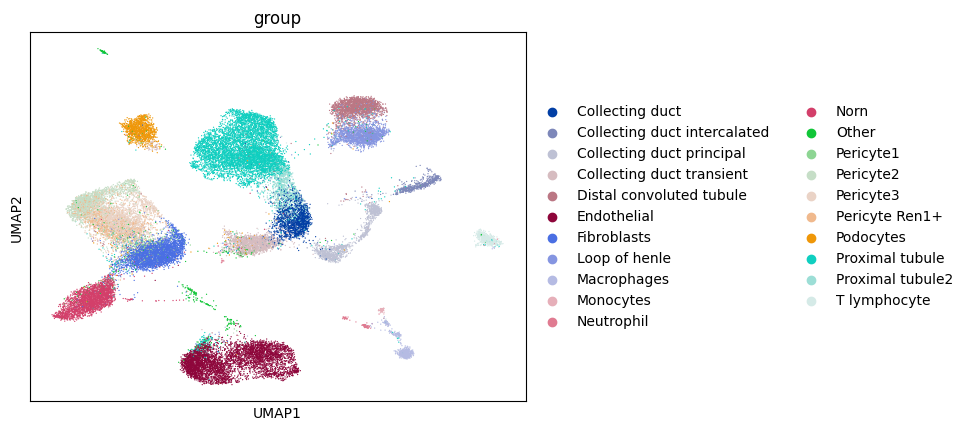

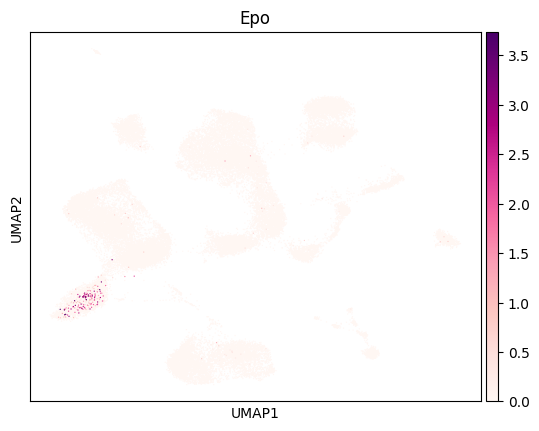

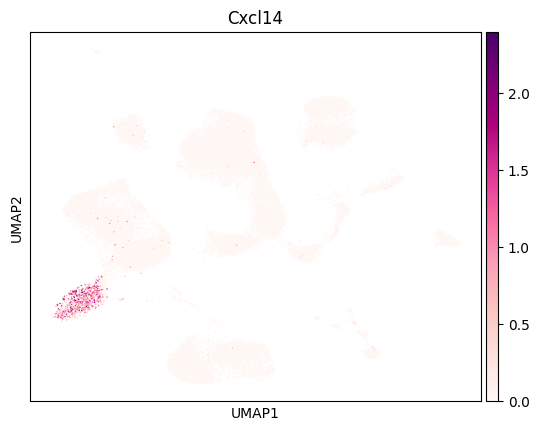

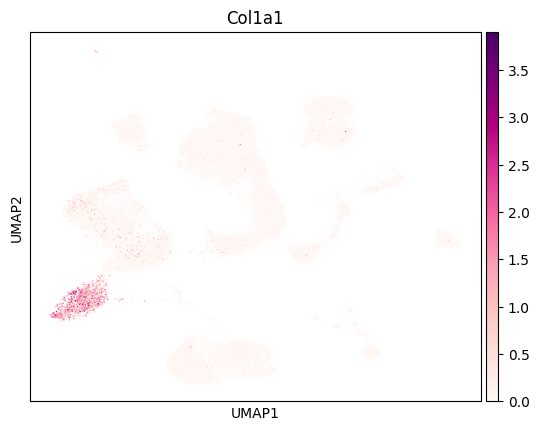

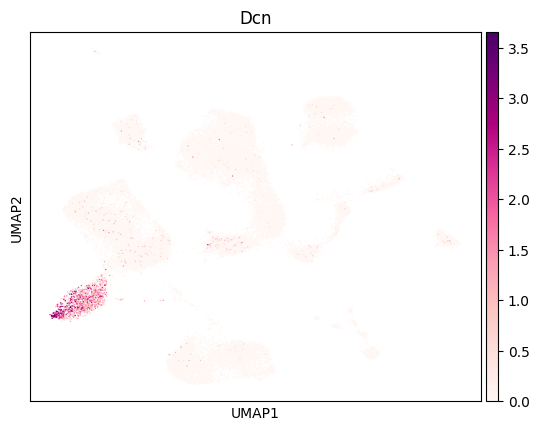

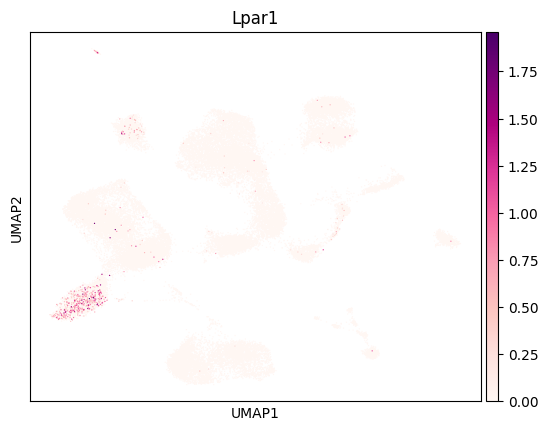

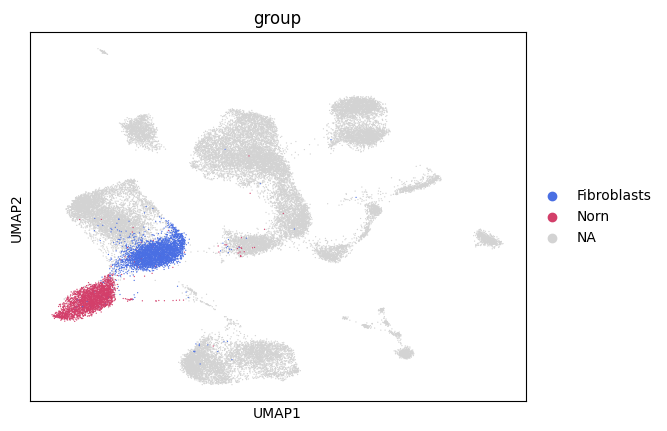

In [21]:
sc.pl.umap(epo_ad, color="group")
sc.pl.umap(epo_ad, color="Epo", cmap="RdPu")
sc.pl.umap(epo_ad, color="Cxcl14", cmap="RdPu")
sc.pl.umap(epo_ad, color="Col1a1", cmap="RdPu")
sc.pl.umap(epo_ad, color="Dcn", cmap="RdPu")
sc.pl.umap(epo_ad, color="Lpar1", cmap="RdPu")
sc.pl.umap(epo_ad, color="group", groups=["Fibroblasts", "Norn"])

In [22]:
epo_ad

AnnData object with n_obs × n_vars = 35834 × 6000
    obs: 'batch', 'treatment', 'metacell', 'genetics', 'group', 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'pca', 'neighbors', 'umap', 'group_colors', 'hvg', 'log1p', 'rank_genes_groups'
    obsm: 'X_uce', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [23]:
import matplotlib.pyplot as plt

In [24]:
sc._settings.settings._vector_friendly=True
import matplotlib

In [25]:
[print(f'"{a}":"",') for a in epo_ad.obs["group"].unique()];

"Norn":"",
"Proximal tubule":"",
"Collecting duct principal":"",
"Distal convoluted tubule":"",
"Fibroblasts":"",
"Endothelial":"",
"Collecting duct transient":"",
"Other":"",
"Pericyte Ren1+":"",
"Podocytes":"",
"Pericyte3":"",
"Pericyte1":"",
"Pericyte2":"",
"Collecting duct intercalated":"",
"Loop of henle":"",
"Proximal tubule2":"",
"Macrophages":"",
"Neutrophil":"",
"T lymphocyte":"",
"Collecting duct":"",
"Monocytes":"",


In [26]:
coarse_group_map = {
    "Norn":"Norn",
    "Proximal tubule":"Proximal Tubule",
    "Collecting duct principal":"Collecting Duct",
    "Distal convoluted tubule":"Distal Convoluted\nTubule",
    "Fibroblasts":"Fibroblast",
    "Endothelial":"Endothelial",
    "Collecting duct transient":"Collecting Duct",
    "Other":"",
    "Pericyte Ren1+":"Pericyte",
    "Podocytes":"Podocyte",
    "Pericyte3":"Pericyte",
    "Pericyte1":"Pericyte",
    "Pericyte2":"Pericyte",
    "Collecting duct intercalated":"Collecting Duct",
    "Loop of henle":"Loop of Henle",
    "Proximal tubule2":"Collecting Duct",
    "Macrophages":"Myeloid",
    "Neutrophil":"Myeloid",
    "T lymphocyte":"Lymphoid",
    "Collecting duct":"Collecting Duct",
    "Monocytes":"Myeloid",
}



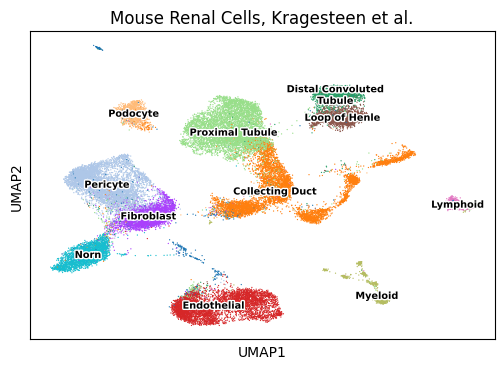

In [27]:
fig, ax = plt.subplots((1), figsize=(6,4))
epo_ad.obs["coarse_group"] = [coarse_group_map[ct] for ct in epo_ad.obs.group]
sc.pl.umap(epo_ad, color="coarse_group", title="Mouse Renal Cells, Kragesteen et al.", show=False, ax = ax, legend_loc='on data', legend_fontsize=7, legend_fontoutline=2)
plt.savefig("figures/epoA.svg");

In [28]:
top_5_datasets

['07854d9c-5375-4a9b-ac34-fa919d3c3686',
 'd7dcfd8f-2ee7-4385-b9ac-e074c23ed190',
 'ea01c125-67a7-4bd3-a8b0-e1b53a011b7e',
 '42bb7f78-cef8-4b0d-9bba-50037d64d8c1',
 '0b75c598-0893-4216-afe8-5414cab7739d',
 '32b9bdce-2481-4c85-ba1b-6ad5fcea844c',
 '2adb1f8a-a6b1-4909-8ee8-484814e2d4bf',
 '48b37086-25f7-4ecd-be66-f5bb378e3aea',
 '98e5ea9f-16d6-47ec-a529-686e76515e39',
 'e067e5ca-e53e-485f-aa8e-efd5435229c8',
 'fd072bc3-2dfb-46f8-b4e3-467cb3223182',
 'bd65a70f-b274-4133-b9dd-0d1431b6af34',
 '9df60c57-fdf3-4e93-828e-fe9303f20438']

# Figure C

In [29]:
NEW_MARKERS = ["Slc12a1", "Umod", "Egf", "Klk1", "Slc12a3", "Tmem52b", "Atp1a1", "Abca13", "Aldh1l1",
                   
                   "Atp6v1g3", "Car2", "Atp6v0d2", "Aqp2", "Epcam", "Cryab", "Npnt", "Spink1", "Ndrg1", "C3",
                  
                   "Egr1", "Slc34a1", "Pck1", "Miox", "Keg1", "Fbp1", "Lyz2", "Apoe", "Srgn", "Ccl6", "Fn1", "Prg4",
                   
                   "Csf1r", "Hexb", "Cx3cr1" , "P2ry12", "S100a8", "Ttr", "S100a9", "Ngp", "Thy1", "Trbc2", "S100a4",
                   
                   "Il7r", "Nphs2", "Sema3g", "Nphs1", "Wt1", "Eng", "Ly6c1", "Pecam1", "Flt1", "Akap12", "Gstm1", "Ncam1",
                   
                   "Gstm2", "Mgp", "Bgn", "Cfh", "Serping1", "Col1a2", "Fbln5", "Igfbp3", "Col1a1", "Col3a1", "Dcn", "Cxcl12",
                   
                   "Hopx", "Agtr1a", "Dkk2", "Cpm", "Igfbp5", "Sfrp2", "Mfge8", "Gata3", "Rgs5", "Cald1", "Ren1", "Akr1b7",
                   
                   "Tpm2", "Mylk"
                   
                  ]
NEGATIVE_GENES_TO_CHECK = [gn.upper() for gn in NEW_MARKERS]



In [30]:
proc_dataset_ads = []
i = 0

datasets_to_lfc = {}
datasets_to_prop_zero = {}
GENES_TO_CHECK = ["DCN", "LPAR1", "COL1A1", "CXCL14", "CXCL12", "CFH", "EPO"]


for ad_name in top_5_datasets[::-1]:
    dataset_lfc = {}
    dataset_prop_zero = {}
    i+=1
    print("********************************")
    print(f"***********  #{i}  ***************")
    print(f"Name: {ad_name}")
    print("--------------------------------")
    
    dataset_subset = kidney_atlas[kidney_atlas.obs.dataset == ad_name]
    dataset_subset_idx = dataset_subset.obs.idx
    dataset_ad = sc.read(f"export_data/kidney_norn_datasets/{ad_name}_proc.h5ad")[dataset_subset_idx]
    dataset_ad.obs["predicted_cell_type"] = dataset_subset.obs["predicted_cell_type"].values
    dataset_ad.raw = None
    
    dataset_ad.var_names = list([st.upper() for st in dataset_ad.var_names])
    
    sc.pp.normalize_per_cell(dataset_ad)
    #sc.pp.highly_variable_genes(dataset_ad, flavor="seurat_v3", n_top_genes=8000, subset=False)
    sc.pp.log1p(dataset_ad)
    #sc.pl.umap(dataset_ad, color="cell_type")
    #sc.pl.umap(dataset_ad, color="predicted_cell_type")
    #sc.pl.umap(dataset_ad, color="predicted_cell_type", groups=["Norn"])
    # genes
    sc.tl.rank_genes_groups(dataset_ad, groupby='predicted_cell_type', groups=["Norn"], use_raw=False)
    # Log fold change
    for gene in GENES_TO_CHECK + NEGATIVE_GENES_TO_CHECK:
        if gene in dataset_ad.var_names:
            lfc = sc.get.rank_genes_groups_df(dataset_ad, group="Norn").set_index("names").loc[gene]["logfoldchanges"]
            prop_expr = float(np.mean(dataset_ad[:, gene].X > 0))

            dataset_lfc[gene] = lfc
            dataset_prop_zero[gene] = prop_expr
            
    
    datasets_to_lfc[ad_name] = dataset_lfc
    datasets_to_prop_zero[ad_name] = dataset_prop_zero
    print(dataset_lfc)
    print(dataset_prop_zero)
    print("--------------------------------")
    print("********************************")

********************************
***********  #1  ***************
Name: 9df60c57-fdf3-4e93-828e-fe9303f20438
--------------------------------
{'DCN': np.float64(2.6288902759552), 'LPAR1': np.float64(4.819206237792969), 'COL1A1': np.float64(4.285223007202148), 'CXCL14': np.float64(-0.23134037852287292), 'CXCL12': np.float64(0.5555528998374939), 'CFH': np.float64(4.278850078582764), 'SLC12A1': np.float64(-1.8694533109664917), 'UMOD': np.float64(-2.6188294887542725), 'EGF': np.float64(-3.288710832595825), 'KLK1': np.float64(0.19852782785892487), 'SLC12A3': np.float64(-5.3500261306762695), 'TMEM52B': np.float64(-3.311845541000366), 'ATP1A1': np.float64(-2.0370700359344482), 'ABCA13': np.float64(-20.895366668701172), 'ALDH1L1': np.float64(-1.9925487041473389), 'ATP6V1G3': np.float64(-24.998191833496094), 'ATP6V0D2': np.float64(-2.8468451499938965), 'AQP2': np.float64(0.34591251611709595), 'EPCAM': np.float64(-1.0080968141555786), 'CRYAB': np.float64(-1.360195279121399), 'NPNT': np.float64(-

{'DCN': 3.5335910320281982, 'LPAR1': 4.217413902282715, 'COL1A1': 3.597543954849243, 'CXCL14': -1.0177897214889526, 'CXCL12': 2.0094878673553467, 'CFH': 3.6314339637756348, 'EPO': 1.908984899520874, 'SLC12A1': -1.9022518396377563, 'UMOD': -1.1804351806640625, 'EGF': -2.8541033267974854, 'KLK1': -5.626310348510742, 'SLC12A3': -2.2232396602630615, 'TMEM52B': -2.4405059814453125, 'ATP1A1': -1.9293721914291382, 'ABCA13': -2.549028158187866, 'ALDH1L1': -2.5772995948791504, 'ATP6V1G3': -2.7030296325683594, 'ATP6V0D2': -2.8218932151794434, 'AQP2': -1.5522640943527222, 'EPCAM': -1.7695993185043335, 'CRYAB': -0.745892345905304, 'NPNT': -1.4184882640838623, 'SPINK1': -1.274163842201233, 'NDRG1': -1.2253698110580444, 'C3': -0.09078525006771088, 'EGR1': 0.5290337800979614, 'SLC34A1': -2.1472666263580322, 'PCK1': -2.124131202697754, 'MIOX': -1.9697548151016235, 'FBP1': -2.4792587757110596, 'APOE': -0.986605167388916, 'SRGN': 1.7818671464920044, 'FN1': 2.8761301040649414, 'PRG4': 0.5884714722633362,

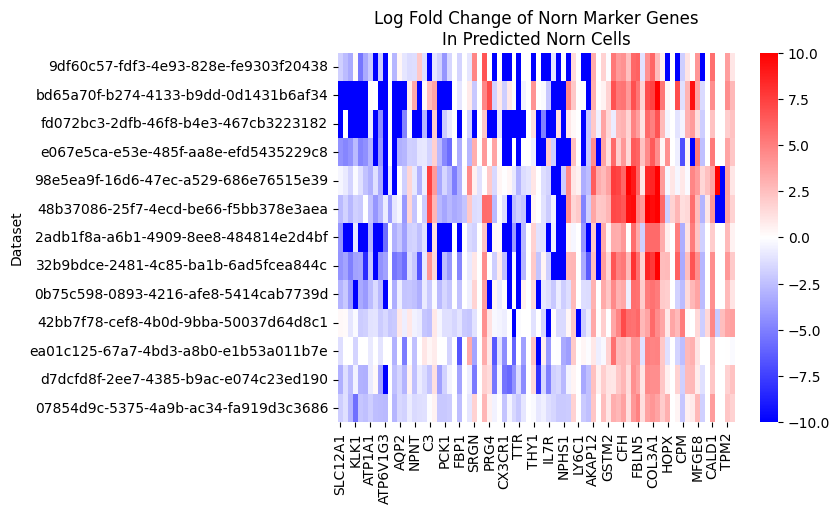

In [31]:
columns=["Dataset"] + NEGATIVE_GENES_TO_CHECK
df = pd.DataFrame(columns=columns)
for k, v in datasets_to_lfc.items():
    row = [k]
    for gene in NEGATIVE_GENES_TO_CHECK:
        if gene in v.keys():
            row.append(v[gene])
        else:
            row.append(np.nan)
    df = pd.concat((df, pd.DataFrame([row], columns = columns)))
    
#df

import seaborn as sns

sns.heatmap(df.set_index("Dataset"), cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Norn Marker Genes\nIn Predicted Norn Cells");

df.to_csv("kidney_log_fold_new.csv", index=False)

# Search in all train data

In [32]:
train_ad = sc.read("export_data/uce_10000_per_dataset_33l_8ep_coarse_ct.h5ad")
train_ad

AnnData object with n_obs × n_vars = 2969114 × 1280
    obs: 'cell_type', 'tissue', 'idx', 'dataset', 'species', 'cell_type_gpt', 'coarse_cell_type_gpt', 'coarse_cell_type_yanay'
    uns: 'cell_type_gpt_colors', 'coarse_cell_type_yanay_colors', 'dataset_colors', 'neighbors', 'pca', 'species_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [33]:
train_ad_X = train_ad.X

In [34]:
train_ad_x_preds = clf.predict(train_ad_X)

In [35]:
train_ad.obs["norn_pred"] = train_ad_x_preds

In [36]:
norn_subset = train_ad[train_ad.obs["norn_pred"] == "Norn"].copy()

In [37]:
high_tissues = list(train_ad.obs.tissue.value_counts().sort_values(ascending=False).head(30).index)
high_tissues

['cerebral cortex',
 'missing',
 'blood',
 'cerebral nuclei',
 'thalamic complex',
 'hippocampal formation',
 'lung',
 'hypothalamus',
 'midbrain',
 'kidney',
 'bone marrow',
 'pons',
 'cerebellum',
 'fovea centralis',
 'gonad',
 'ileum',
 'cortex of kidney',
 'myelencephalon',
 'islet of Langerhans',
 'liver',
 'primary motor cortex',
 'breast',
 'retina',
 'prefrontal cortex',
 'peripheral region of retina',
 'heart left ventricle',
 'ovary',
 'small intestine',
 'thymus',
 'tonsil']

In [38]:
train_ad[train_ad.obs.tissue.isin(high_tissues)].obs[["tissue", "norn_pred"]].groupby("tissue").agg(lambda x : np.mean(x == "Norn")).sort_values("norn_pred", ascending=False).head(25)

,norn_pred
tissue,
gonad,0.190783
heart left ventricle,0.157696
small intestine,0.129500
ileum,0.112458
ovary,0.085650
lung,0.079864
kidney,0.079349
missing,0.076701
breast,0.071100


In [39]:
norn_subset_lung = norn_subset[norn_subset.obs.tissue.str.contains("lung")].copy()

In [40]:
lung_datasets = list(norn_subset_lung.obs["dataset"].value_counts().index)[0:6]
lung_datasets

['3dc61ca1-ce40-46b6-8337-f27260fd9a03',
 '4b6af54a-4a21-46e0-bc8d-673c0561a836',
 'd8da613f-e681-4c69-b463-e94f5e66847f',
 '047d57f2-4d14-45de-aa98-336c6f583750',
 'e04daea4-4412-45b5-989e-76a9be070a89',
 '9f222629-9e39-47d0-b83f-e08d610c7479']

In [41]:
norn_subset_heart = norn_subset[norn_subset.obs.tissue.str.contains("heart")].copy()

In [42]:
heart_datasets = list(norn_subset_heart.obs["dataset"].value_counts().index)[0:6]
heart_datasets

['1c739a3e-c3f5-49d5-98e0-73975e751201',
 'f15e263b-6544-46cb-a46e-e33ab7ce8347',
 '5500c673-1610-40a0-86d9-64d987ae50e6',
 'd4e69e01-3ba2-4d6b-a15d-e7048f78f22e',
 '65badd7a-9262-4fd1-9ce2-eb5dc0ca8039',
 '48b37086-25f7-4ecd-be66-f5bb378e3aea']

## Lung

In [43]:
proc_dataset_ads = []
i = 0

datasets_to_lfc = {}
datasets_to_prop_zero = {}
GENES_TO_CHECK = ["DCN", "LPAR1", "COL1A1", "CXCL14", "CXCL12", "CFH", "EPO"]



for ad_name in lung_datasets:
    dataset_lfc = {}
    dataset_prop_zero = {}
    i+=1
    print("********************************")
    print(f"***********  #{i}  ***************")
    print(f"Name: {ad_name}")
    print("--------------------------------")
    
    #dataset_subset = kidney_atlas[kidney_atlas.obs.dataset == ad_name]
    #dataset_subset_idx = dataset_subset.obs.idx
    dataset_ad = sc.read(f"export_data/lung_norn_datasets/{ad_name}_proc.h5ad")#[dataset_subset_idx]
    ncell = dataset_ad.X.shape[0]
    uce_embs = np.memmap(f"export_data/lung_norn_datasets/{ad_name}.npz", shape=(ncell, 1280), dtype="float32")
    
    dataset_ad.obs["predicted_cell_type"] = clf.predict(uce_embs)
    dataset_ad.raw = None
    
    dataset_ad.var_names = list([st.upper() for st in dataset_ad.var_names])
    
    sc.pp.normalize_per_cell(dataset_ad)
    #sc.pp.highly_variable_genes(dataset_ad, flavor="seurat_v3", n_top_genes=8000, subset=False)
    sc.pp.log1p(dataset_ad)
    #sc.pl.umap(dataset_ad, color="cell_type")
    #sc.pl.umap(dataset_ad, color="predicted_cell_type")
    #sc.pl.umap(dataset_ad, color="predicted_cell_type", groups=["Norn"])
    # genes
    sc.tl.rank_genes_groups(dataset_ad, groupby='predicted_cell_type', groups=["Norn"], use_raw=False)
    # Log fold change
    for gene in GENES_TO_CHECK + NEGATIVE_GENES_TO_CHECK:
        if gene in dataset_ad.var_names:
            lfc = sc.get.rank_genes_groups_df(dataset_ad, group="Norn").set_index("names").loc[gene]["logfoldchanges"]
            prop_expr = float(np.mean(dataset_ad[:, gene].X > 0))

            dataset_lfc[gene] = lfc
            dataset_prop_zero[gene] = prop_expr
            
    datasets_to_lfc[ad_name] = dataset_lfc
    datasets_to_prop_zero[ad_name] = dataset_prop_zero
    print(dataset_lfc)
    print(dataset_prop_zero)
    print("--------------------------------")
    print("********************************")

********************************
***********  #1  ***************
Name: 3dc61ca1-ce40-46b6-8337-f27260fd9a03
--------------------------------
{'DCN': np.float64(4.671513080596924), 'LPAR1': np.float64(3.179119110107422), 'COL1A1': np.float64(4.724286079406738), 'CXCL14': np.float64(0.6903477907180786), 'CXCL12': np.float64(2.641190767288208), 'CFH': np.float64(1.9317796230316162), 'EPO': np.float64(-2.4146299362182617), 'EGF': np.float64(-2.919260025024414), 'KLK1': np.float64(-4.573985576629639), 'SLC12A3': np.float64(-4.086888313293457), 'TMEM52B': np.float64(-2.874798059463501), 'ATP1A1': np.float64(-0.9464425444602966), 'ABCA13': np.float64(-6.248563766479492), 'ALDH1L1': np.float64(-2.7821452617645264), 'ATP6V1G3': np.float64(-1.381380558013916), 'ATP6V0D2': np.float64(-17.735897064208984), 'EPCAM': np.float64(-3.9064066410064697), 'CRYAB': np.float64(1.04313063621521), 'NPNT': np.float64(1.4797265529632568), 'SPINK1': np.float64(-4.651485443115234), 'NDRG1': np.float64(-1.5309830

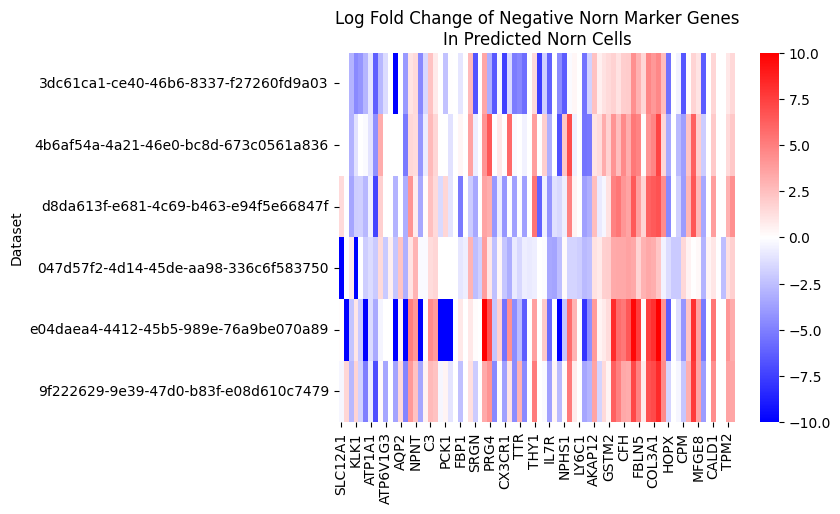

In [44]:
columns=["Dataset"] + NEGATIVE_GENES_TO_CHECK
df = pd.DataFrame(columns=columns)
for k, v in datasets_to_lfc.items():
    row = [k]
    for gene in NEGATIVE_GENES_TO_CHECK:
        if gene in v.keys():
            row.append(v[gene])
        else:
            row.append(np.nan)
    df = pd.concat((df, pd.DataFrame([row], columns = columns)))
    
#df

import seaborn as sns

sns.heatmap(df.set_index("Dataset"), cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Negative Norn Marker Genes\nIn Predicted Norn Cells");

df.to_csv("lung_log_fold_new.csv", index=False)

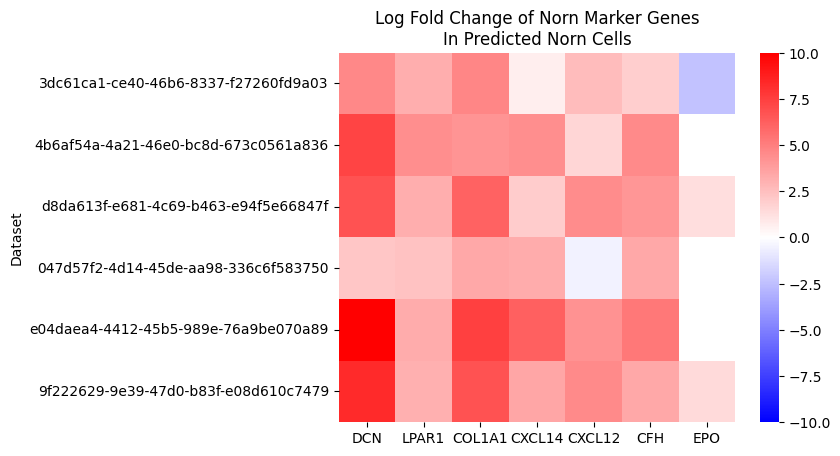

In [45]:
columns=["Dataset"] + GENES_TO_CHECK
df = pd.DataFrame(columns=columns)
for k, v in datasets_to_lfc.items():
    row = [k]
    for gene in GENES_TO_CHECK:
        if gene in v.keys():
            row.append(v[gene])
        else:
            row.append(np.nan)
    df = pd.concat((df, pd.DataFrame([row], columns = columns)))
    
#df

import seaborn as sns

sns.heatmap(df.set_index("Dataset"), cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Norn Marker Genes\nIn Predicted Norn Cells");

df.to_csv("lung_log_fold.csv", index=False)

## Heart

In [46]:
proc_dataset_ads = []
i = 0

datasets_to_lfc = {}
datasets_to_prop_zero = {}
GENES_TO_CHECK = ["DCN", "LPAR1", "COL1A1", "CXCL14", "CXCL12", "CFH", "EPO"]



for ad_name in heart_datasets:
    dataset_lfc = {}
    dataset_prop_zero = {}
    i+=1
    print("********************************")
    print(f"***********  #{i}  ***************")
    print(f"Name: {ad_name}")
    print("--------------------------------")
    
    #dataset_subset = kidney_atlas[kidney_atlas.obs.dataset == ad_name]
    #dataset_subset_idx = dataset_subset.obs.idx
    dataset_ad = sc.read(f"export_data/heart_norn_datasets/{ad_name}_proc.h5ad")#[dataset_subset_idx]
    ncell = dataset_ad.X.shape[0]
    uce_embs = np.memmap(f"export_data/heart_norn_datasets/{ad_name}.npz", shape=(ncell, 1280), dtype="float32")
    
    dataset_ad.obs["predicted_cell_type"] = clf.predict(uce_embs)
    dataset_ad.raw = None
    
    dataset_ad.var_names = list([st.upper() for st in dataset_ad.var_names])
    
    sc.pp.normalize_per_cell(dataset_ad)
    #sc.pp.highly_variable_genes(dataset_ad, flavor="seurat_v3", n_top_genes=8000, subset=False)
    sc.pp.log1p(dataset_ad)
    #sc.pl.umap(dataset_ad, color="cell_type")
    #sc.pl.umap(dataset_ad, color="predicted_cell_type")
    #sc.pl.umap(dataset_ad, color="predicted_cell_type", groups=["Norn"])
    # genes
    sc.tl.rank_genes_groups(dataset_ad, groupby='predicted_cell_type', groups=["Norn"], use_raw=False)
    # Log fold change
    for gene in GENES_TO_CHECK + NEGATIVE_GENES_TO_CHECK:
        if gene in dataset_ad.var_names:
            lfc = sc.get.rank_genes_groups_df(dataset_ad, group="Norn").set_index("names").loc[gene]["logfoldchanges"]
            prop_expr = float(np.mean(dataset_ad[:, gene].X > 0))

            dataset_lfc[gene] = lfc
            dataset_prop_zero[gene] = prop_expr
            
    datasets_to_lfc[ad_name] = dataset_lfc
    datasets_to_prop_zero[ad_name] = dataset_prop_zero
    print(dataset_lfc)
    print(dataset_prop_zero)
    print("--------------------------------")
    print("********************************")

********************************
***********  #1  ***************
Name: 1c739a3e-c3f5-49d5-98e0-73975e751201
--------------------------------
{'DCN': np.float64(2.3928029537200928), 'LPAR1': np.float64(2.837895393371582), 'COL1A1': np.float64(2.071955442428589), 'CXCL14': np.float64(1.213927149772644), 'CXCL12': np.float64(1.4238377809524536), 'CFH': np.float64(2.9111390113830566), 'SLC12A1': np.float64(0.9246166348457336), 'EGF': np.float64(-2.453434944152832), 'KLK1': np.float64(0.4964381754398346), 'SLC12A3': np.float64(-1.3356287479400635), 'TMEM52B': np.float64(-1.0335484743118286), 'ATP1A1': np.float64(-0.03188871964812279), 'ABCA13': np.float64(-1.098695158958435), 'ALDH1L1': np.float64(-1.6245708465576172), 'ATP6V0D2': np.float64(-0.7254719734191895), 'EPCAM': np.float64(-1.0530037879943848), 'CRYAB': np.float64(-0.5757490396499634), 'NPNT': np.float64(-1.2232928276062012), 'SPINK1': np.float64(-2.682135581970215), 'NDRG1': np.float64(0.5551467537879944), 'C3': np.float64(2.575

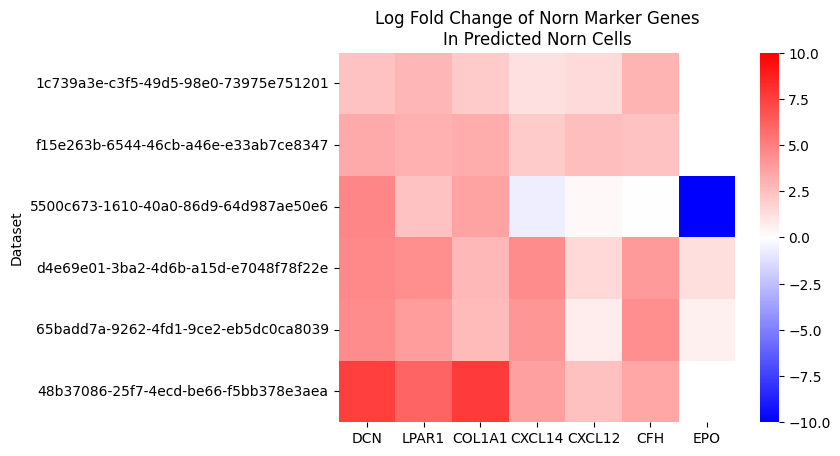

In [47]:
columns=["Dataset"] + GENES_TO_CHECK
df = pd.DataFrame(columns=columns)
for k, v in datasets_to_lfc.items():
    row = [k]
    for gene in GENES_TO_CHECK:
        if gene in v.keys():
            row.append(v[gene])
        else:
            row.append(np.nan)
    df = pd.concat((df, pd.DataFrame([row], columns = columns)))
    
#df

import seaborn as sns

sns.heatmap(df.set_index("Dataset"), cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Norn Marker Genes\nIn Predicted Norn Cells");

df.to_csv("heart_log_fold.csv", index=False)

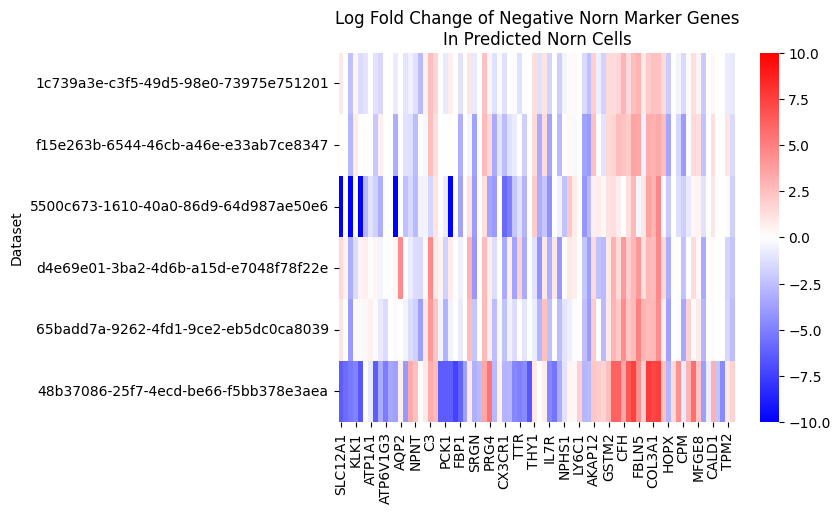

In [48]:
columns=["Dataset"] + NEGATIVE_GENES_TO_CHECK
df = pd.DataFrame(columns=columns)
for k, v in datasets_to_lfc.items():
    row = [k]
    for gene in NEGATIVE_GENES_TO_CHECK:
        if gene in v.keys():
            row.append(v[gene])
        else:
            row.append(np.nan)
    df = pd.concat((df, pd.DataFrame([row], columns = columns)))
    
#df

import seaborn as sns

sns.heatmap(df.set_index("Dataset"), cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Negative Norn Marker Genes\nIn Predicted Norn Cells");

df.to_csv("heart_log_fold_new.csv", index=False)

In [49]:
1+1

2

# Figure D and E

# Kaminski 2020

In [50]:
kam20_ad = sc.read("export_data/kaminski20_ep_8_sn_2013249_nlayers_33_sample_size_1024.h5ad")
kam20_ad

AnnData object with n_obs × n_vars = 312928 × 18089
    obs: 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'Subject_Identity', 'Library_Identity', 'n_genes'
    var: 'gene_ids', 'n_cells'
    obsm: 'X_uce'

In [53]:
kam20_pred = clf.predict(kam20_ad.obsm["X_uce"])
kam20_ad.obs["pred"] = kam20_pred

In [56]:
kam20_ad

AnnData object with n_obs × n_vars = 312928 × 18089
    obs: 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'Subject_Identity', 'Library_Identity', 'n_genes', 'pred'
    var: 'gene_ids', 'n_cells'
    uns: 'neighbors', 'umap', 'Manuscript_Identity_colors', 'pred_colors'
    obsm: 'X_uce', 'X_umap'
    obsp: 'distances', 'connectivities'

In [57]:
sc.pp.normalize_per_cell(kam20_ad)
sc.pp.log1p(kam20_ad)

# Generate kam20 heatmap

In [60]:
datasets_to_lfc = {}
datasets_to_prop_zero = {}
GENES_TO_CHECK = ["DCN", "LPAR1", "COL1A1", "CXCL14", "CXCL12", "CFH", "EPO"]


sc.tl.rank_genes_groups(kam20_ad, groupby='pred', groups=["Norn"], use_raw=False)
# Log fold change
for gene in GENES_TO_CHECK:
    if gene in kam20_ad.var_names:
        lfc = sc.get.rank_genes_groups_df(kam20_ad, group="Norn").set_index("names").loc[gene]["logfoldchanges"]
        prop_expr = float(np.mean(kam20_ad[:, gene].X > 0))

        dataset_lfc[gene] = lfc
        dataset_prop_zero[gene] = prop_expr

datasets_to_lfc["kam20"] = dataset_lfc
datasets_to_prop_zero["kam20"] = dataset_prop_zero

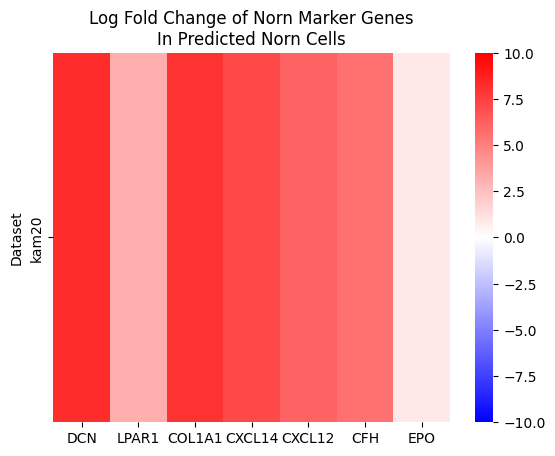

In [61]:
columns=["Dataset"] + GENES_TO_CHECK
df = pd.DataFrame(columns=columns)
for k, v in datasets_to_lfc.items():
    row = [k]
    for gene in GENES_TO_CHECK:
        if gene in v.keys():
            row.append(v[gene])
        else:
            row.append(np.nan)
    df = pd.concat((df, pd.DataFrame([row], columns = columns)))
    
#df

import seaborn as sns

sns.heatmap(df.set_index("Dataset"), cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Norn Marker Genes\nIn Predicted Norn Cells");

df.to_csv("kam20_log_fold.csv", index=False)

In [62]:
stromal_preds = kam20_ad.obs[["Disease_Identity", "Manuscript_Identity", "pred"]].value_counts().loc[:, "Fibroblast", :]
stromal_preds

Disease_Identity  pred           
IPF               Norn               1238
Control           Norn                760
COPD              Norn                319
IPF               Collecting duct     168
Control           Collecting duct      69
IPF               Podocyte             30
COPD              Collecting duct      27
Control           Podocyte             15
COPD              Podocyte             12
IPF               Proximal tubule       4
Control           T cell                2
IPF               Fibroblast            2
                  T cell                1
Control           Proximal tubule       1
COPD              Proximal tubule       1
Name: count, dtype: int64

In [63]:
kam20_ad.obs[["Disease_Identity", "CellType_Category"]].value_counts().loc[:, "Stromal"]

Disease_Identity
IPF        5463
Control    1144
COPD        935
Name: count, dtype: int64

In [64]:
4247 / 5463 # IPF

0.7774116785648911

In [65]:
1024 / 1144 # Control

0.8951048951048951

In [66]:
761 / 935 # COPD

0.813903743315508

In [67]:
kam20_ad.obs[["Disease_Identity", "pred"]].value_counts()

Disease_Identity  pred           
IPF               Proximal tubule    55515
Control           Proximal tubule    39505
IPF               T cell             37207
COPD              T cell             28482
Control           T cell             27867
IPF               Granulocyte        25227
COPD              Proximal tubule    24814
Control           Granulocyte        19199
IPF               Collecting duct    11313
COPD              Granulocyte         8059
IPF               Macrophage          6738
                  Norn                4229
                  Endothelial         4137
Control           Macrophage          2872
COPD              Macrophage          2190
Control           Endothelial         1990
COPD              Podocyte            1647
IPF               Podocyte            1335
Control           Podocyte            1288
COPD              Endothelial         1106
IPF               Pericyte            1093
Control           Norn                1005
COPD              No

In [68]:
kam20_ad.obs["Disease_Identity"].value_counts()

Disease_Identity
IPF        147169
Control     96303
COPD        69456
Name: count, dtype: int64

In [73]:
kam20_norn_ad = kam20_ad[kam20_ad.obs.pred == "Norn"].copy()

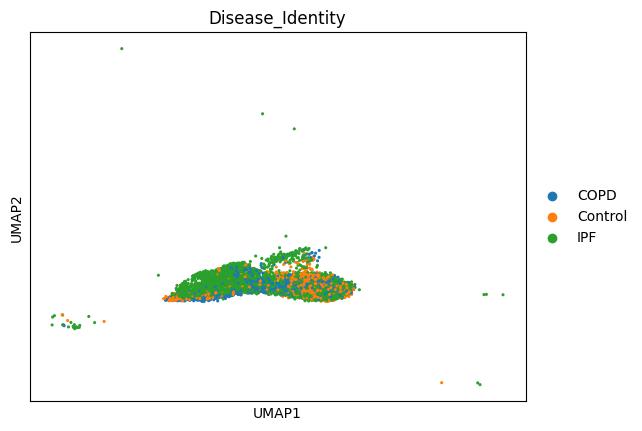

In [74]:
sc.pl.umap(kam20_norn_ad, color="Disease_Identity")

In [75]:
sc.tl.rank_genes_groups(kam20_norn_ad, groupby="Disease_Identity")

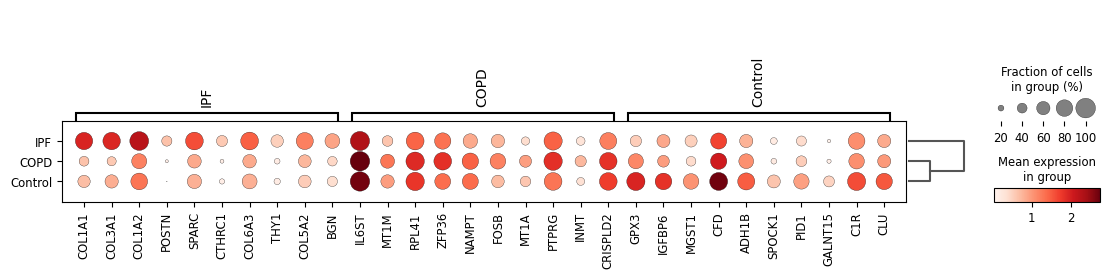

In [76]:
sc.pl.rank_genes_groups_dotplot(kam20_norn_ad)

In [77]:
kam20_norn_ad.obs["control"] = pd.Categorical(kam20_norn_ad.obs["Disease_Identity"] == "Control")

In [78]:
sc.tl.rank_genes_groups(kam20_norn_ad, groupby="control")

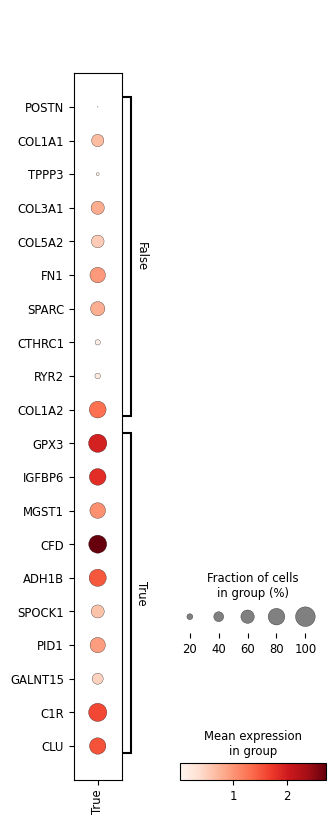

In [79]:
fig, ax = plt.subplots(1,1, figsize=(3.25, 10))
sc.pl.rank_genes_groups_dotplot(kam20_norn_ad, n_genes=10, swap_axes=True, ax=ax)

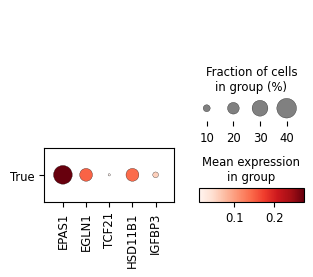

In [80]:
sc.pl.dotplot(kam20_norn_ad, groupby="control", var_names=["EPAS1", "EGLN1", "TCF21", "Hsd11b1".upper(), "Igfbp3".upper()])

## EPAS1 EGLN1 Checks

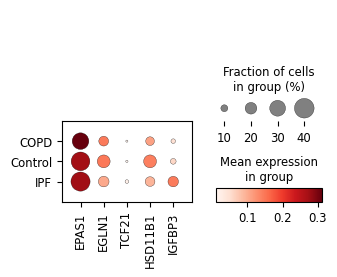

In [81]:
sc.pl.dotplot(kam20_norn_ad, groupby="Disease_Identity", var_names=
              [
    "EPAS1", "EGLN1", "TCF21", "Hsd11b1".upper(), "Igfbp3".upper(), ], show=False
                           )
plt.savefig("figures/kam20_dotplot_1.svg")

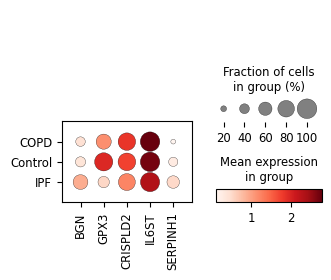

In [82]:
sc.pl.dotplot(kam20_norn_ad, groupby="Disease_Identity", var_names=
              [
    "BGN", "GPX3", "CRISPLD2", "IL6ST", "SERPINH1"], show=False
                           )

plt.savefig("figures/kam20_dotplot_2.svg")

In [83]:
sc.get.rank_genes_groups_df(kam20_norn_ad, group=["False"]).set_index("names").loc["EGLN1"]

scores           -3.332188
logfoldchanges   -0.442365
pvals             0.000885
pvals_adj         0.005624
Name: EGLN1, dtype: float64

In [84]:
sc.get.rank_genes_groups_df(kam20_norn_ad, group=["True"]).set_index("names").loc["EGLN1"]

scores            3.332188
logfoldchanges    0.442365
pvals             0.000885
pvals_adj         0.005624
Name: EGLN1, dtype: float64

In [85]:
kam20_norn_ad.obs["ratio"] = (kam20_norn_ad[:, "EPAS1"].X.toarray() / (kam20_norn_ad[:, "EGLN1"].X.toarray() + 1))

In [90]:
kam20_norn_ad.obs[["ratio", "Disease_Identity"]].groupby("Disease_Identity").agg(np.mean)

,ratio
Disease_Identity,
COPD,0.284066
Control,0.246758
IPF,0.255316


In [91]:
sc.tl.rank_genes_groups(kam20_norn_ad, groupby="Disease_Identity")
sc.get.rank_genes_groups_df(kam20_norn_ad, group=["IPF"]).set_index("names").loc["IL6ST"]

scores            -2.336390e+01
logfoldchanges    -6.268762e-01
pvals             9.107836e-113
pvals_adj         1.029698e-109
Name: IL6ST, dtype: float64

### significance test

In [92]:
from tqdm.notebook import tqdm
np.random.seed(8)
labels = kam20_norn_ad.obs["Disease_Identity"]

n_trials = 10000
df = pd.DataFrame()
df["ratio"] = (kam20_norn_ad[:, "EPAS1"].X.toarray() / (kam20_norn_ad[:, "EGLN1"].X.toarray() + 1)).flatten()
df["disease"] = labels.values
aggd = df.groupby("disease").agg(np.mean)["ratio"]
test_stat = aggd.loc["COPD"] - aggd.loc["IPF"]
print("Test Stat", test_stat)

simulated_stats = []

for trial in tqdm(range(n_trials)):
    labels_shuffled = np.random.choice(labels, replace=False, size=len(labels))
    df["disease"] = labels_shuffled
    aggd = df.groupby("disease").agg(np.mean)["ratio"]
    stat = aggd.loc["COPD"] - aggd.loc["IPF"]
    simulated_stats.append(stat)
    
simulated_stats = np.array(simulated_stats)
print("Empirical P Value", np.mean(simulated_stats >= test_stat))

Test Stat 0.02875033


  0%|          | 0/10000 [00:00<?, ?it/s]

Empirical P Value 0.039


In [93]:
aggd = df.groupby("disease").agg(np.mean)["ratio"]
aggd.loc["COPD"] - aggd.loc["IPF"]

np.float32(-0.0052802563)